In [2]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

C:\Users\aayushg95\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#loading the data
def load_data(path):
    loaded_data = loadmat(path)
    return loaded_data['X'], loaded_data['y']

X_train, Y_train = load_data('train_32x32.mat')
X_test, Y_test = load_data('test_32x32.mat')
X_train_original = X_train
X_test_original = X_test

In [4]:
X_train.shape

(32, 32, 3, 73257)

In [5]:
X_test.shape

(32, 32, 3, 26032)

In [6]:
#changing the shape of the training and the test dataset
X_train = X_train.transpose((3, 0, 1, 2))
X_test = X_test.transpose((3, 0, 1, 2))

In [7]:
X_train.shape

(73257, 32, 32, 3)

In [8]:
X_test.shape

(26032, 32, 32, 3)

In [9]:
Y_train.ndim

2

In [10]:
Y_train = Y_train[:,0]
Y_test = Y_test[:,0]

In [11]:
Y_train.ndim

1

In [12]:
np.unique(Y_test)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [13]:
#changing the label of 0 from 10 to 0
Y_train[Y_train==10] = 0
Y_test[Y_test==10] = 0

In [14]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

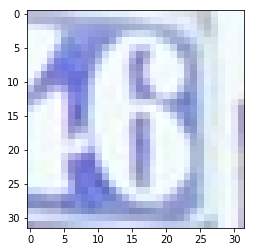

In [15]:
plt.imshow(X_train[10600])

In [16]:
X_train_original = X_train
Y_train_original = Y_train
X_test_original = X_test

In [17]:
#splitting the training set into training and validation set using sklearn
#using random_state to generate the same sets everytime
X_train, X_val, Y_train, Y_val = train_test_split(X_train_original, Y_train_original, test_size=0.15, random_state=3)

In [18]:
X_train.shape

(62268, 32, 32, 3)

In [19]:
X_val.shape

(10989, 32, 32, 3)

In [20]:
Y_train.shape

(62268,)

In [21]:
Y_val.shape

(10989,)

In [22]:
#converting array of ints to array of floats for arithmetic operations
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

In [23]:
#test = np.expand_dims(np.dot(X_train[0], rgb2grey), axis=2)

In [24]:
#test.shape

In [25]:
#plt.imshow(test[:,:,0], cmap="gray")

In [26]:
#converting rgb images to grayscale images for faster computations
rgb2grey = [0.2990, 0.5870, 0.1140]
X_train = np.expand_dims(np.dot(X_train, rgb2grey), axis=3)
X_val = np.expand_dims(np.dot(X_val, rgb2grey), axis=3)
X_test = np.expand_dims(np.dot(X_test, rgb2grey), axis=3)

In [27]:
X_train.shape

(62268, 32, 32, 1)

In [28]:
#normalising the training data for better training
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

X_train_normalised = (X_train-train_mean)/train_std
X_val_normalised = (X_val-train_mean)/train_std
X_test_normalised = (X_test-train_mean)/train_std

In [30]:
Y_val.shape

(10989,)

In [31]:
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [32]:
Y_train.shape

(62268, 10)

In [33]:
Y_val.shape

(10989, 10)

In [34]:
Y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [35]:
Y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])